In [1]:
%load_ext autoreload
%autoreload 2

# Keras VGG19 Example for Image Classification

In [2]:
from tensorflow.keras.applications.vgg19 import VGG19
model = VGG19()

W1104 07:59:18.848867 140142324029248 deprecation.py:506] From /home/rtwomey/.local/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
print(model.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='vgg.png')

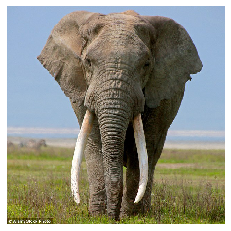

*******
tusker (68.75%)
African_elephant (28.02%)
Indian_elephant (3.24%)
ram (0.00%)
megalith (0.00%)


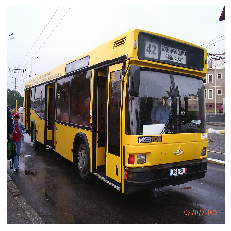

*******
trolleybus (78.83%)
school_bus (15.10%)
minibus (3.32%)
passenger_car (1.44%)
streetcar (0.46%)


In [6]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg19 import preprocess_input

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

fileList=['img/elephant.jpg','img/bus.jpg']

for image_path in fileList:
    
    # load an image from file
    image = load_img(image_path, target_size=(224, 224))

    im2show = image
    
    # convert the image pixels to a numpy array
    image = img_to_array(image)

    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    # prepare the image for the VGG model
    image = preprocess_input(image)
    
    # predict the probability across all output classes
    yhat = model.predict(image)
    
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    # label = label[0][0]

    plt.figure(figsize=(4, 4))
    plt.axis("off")
    plt.imshow(im2show)
    plt.show()
    
    print("*******")
    # print matched labels
    for label in label[0]:
        # print the classification
        print('%s (%.2f%%)' % (label[1], label[2]*100))
    

## A Brief Tour of Layer Activations
We will step down through the layers and view a few activation maps.

In [7]:
from read_activations import get_activations

In [8]:
activations = get_activations(model, image, print_shape_only=True) 

----- activations -----
(1, 224, 224, 64)
(1, 224, 224, 64)
(1, 112, 112, 64)
(1, 112, 112, 128)
(1, 112, 112, 128)
(1, 56, 56, 128)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 28, 28, 256)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 7, 7, 512)
(1, 25088)
(1, 4096)
(1, 4096)
(1, 1000)


In [9]:
len(activations)

25

Step through layers and view activation maps (feature maps).

__Layer 0__: 224 x 224 pixels

In [ ]:
activations[0][0,:,:,0].shape

In [ ]:
plt.imshow(activations[0][0,:,:,0])

__Layer 1__: 224 x 224 pixels

In [ ]:
activations[1].shape

In [ ]:
activations[1][0,:,:,23].shape # 23 selects the 23rd feature map

In [ ]:
plt.imshow(activations[1][0,:,:,23])

__Layer 3__: 112 x 112 pixels

In [ ]:
activations[3].shape

In [ ]:
activations[3][0,:,:,47].shape

In [ ]:
plt.imshow(activations[3][0,:,:,47])

__Layer 5__: 56 x 56 pixels

In [ ]:
activations[5].shape

In [ ]:
activations[5][0,:,:,17].shape # 17th out of 128 feature maps

In [ ]:
plt.imshow(activations[5][0,:,:,17])

__Layer 10__: 28 x 28 pixels

In [ ]:
print(activations[10].shape)
print(activations[10][0,:,:,10].shape)
plt.imshow(activations[10][0,:,:,10]) # 10 out of 256 feature maps

__Layer 15__: 14 x 14 pixels

In [ ]:
print(activations[15].shape)
print(activations[15][0,:,:,1].shape)
plt.imshow(activations[15][0,:,:,1]) # 1 out of 512 feature maps

__Layer 24__: The last layer, 1 x 1000 wth softmax (categories). 

Reshaped to be 25 x 40 instead of a single long vector. The highest value (yellow spot) corresponds to the most likely predicted category.

In [ ]:
mtx=activations[24][0]
mtx.shape
mtx2=mtx.reshape(25,40)
fig=plt.imshow(mtx2)
plt.colorbar(fig)